In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import numpy as np

In [55]:
login_data = pd.read_json("logins.json")

In [56]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [57]:
login_data.shape

(93142, 1)

In [58]:
login_data.dtypes

login_time    datetime64[ns]
dtype: object

In [59]:
login_data.set_index("login_time", inplace=True)

In [101]:
login_data["year"]=login_data.index.year.astype('category')
login_data["month"]=login_data.index.month.astype('category')
login_data["day"]=login_data.index.day.astype('category')
login_data["time"]=login_data.index.time
login_data["count"]=1

In [102]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    93142 non-null  category
 1   month   93142 non-null  category
 2   day     93142 non-null  category
 3   time    93142 non-null  object  
 4   count   93142 non-null  int64   
dtypes: category(3), int64(1), object(1)
memory usage: 4.9+ MB


In [110]:
log = login_data.resample("15T").count()

In [111]:
log

,year,month,day,time,count
login_time,,,,,
1970-01-01 20:00:00,2,2,2,2,2
1970-01-01 20:15:00,6,6,6,6,6
1970-01-01 20:30:00,9,9,9,9,9
1970-01-01 20:45:00,7,7,7,7,7
1970-01-01 21:00:00,1,1,1,1,1
...,...,...,...,...,...
1970-04-13 17:45:00,5,5,5,5,5
1970-04-13 18:00:00,5,5,5,5,5
1970-04-13 18:15:00,2,2,2,2,2


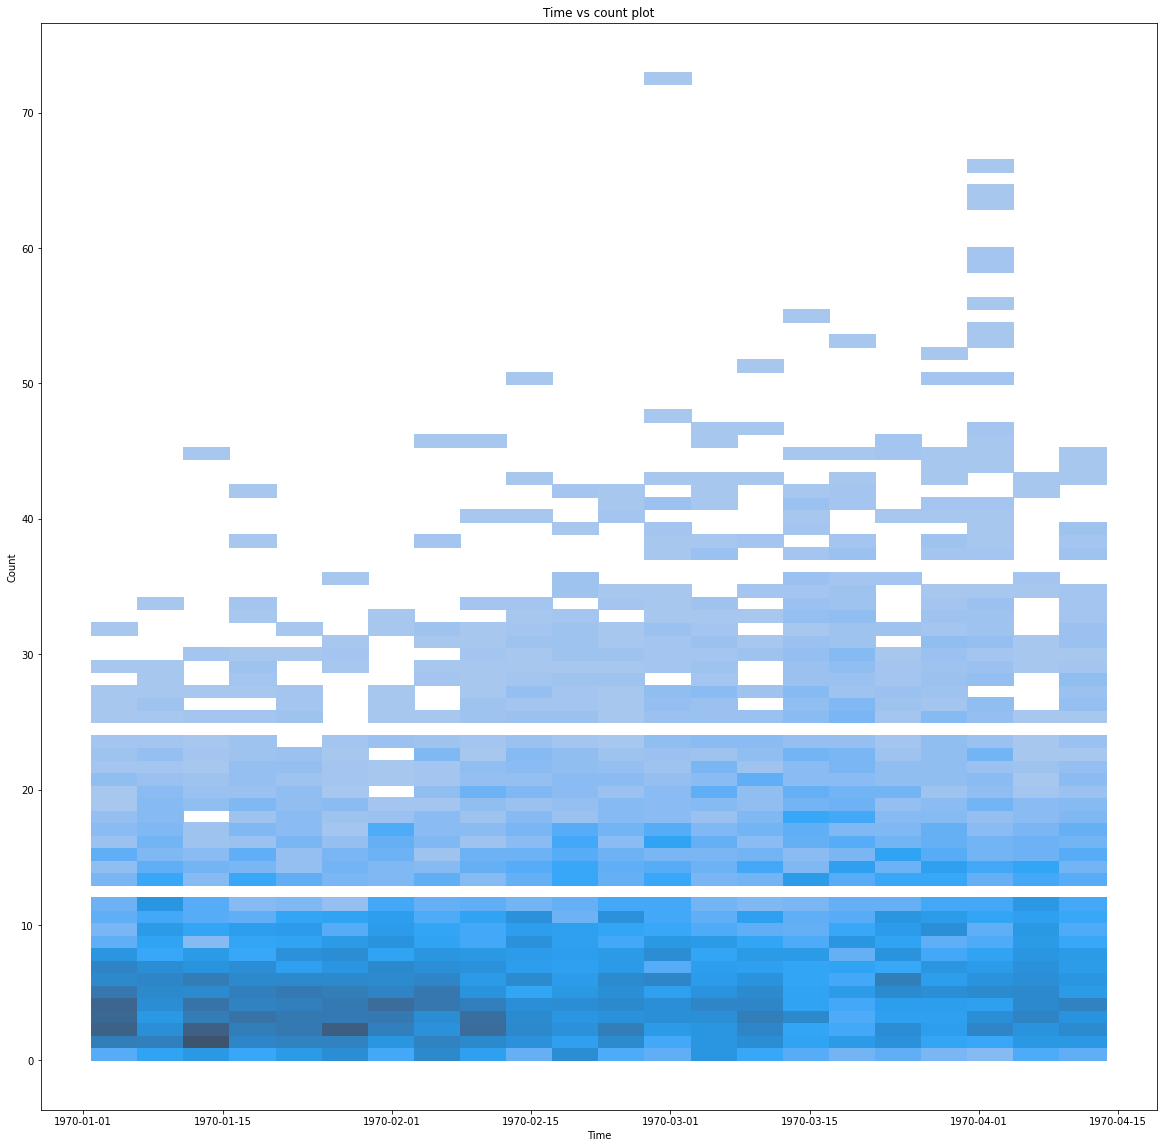

In [63]:
figure = plt.figure(figsize=(20,20))
sns.histplot(x=log.index,y="count",data= log)
plt.xticks()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Time vs count plot")
plt.show()

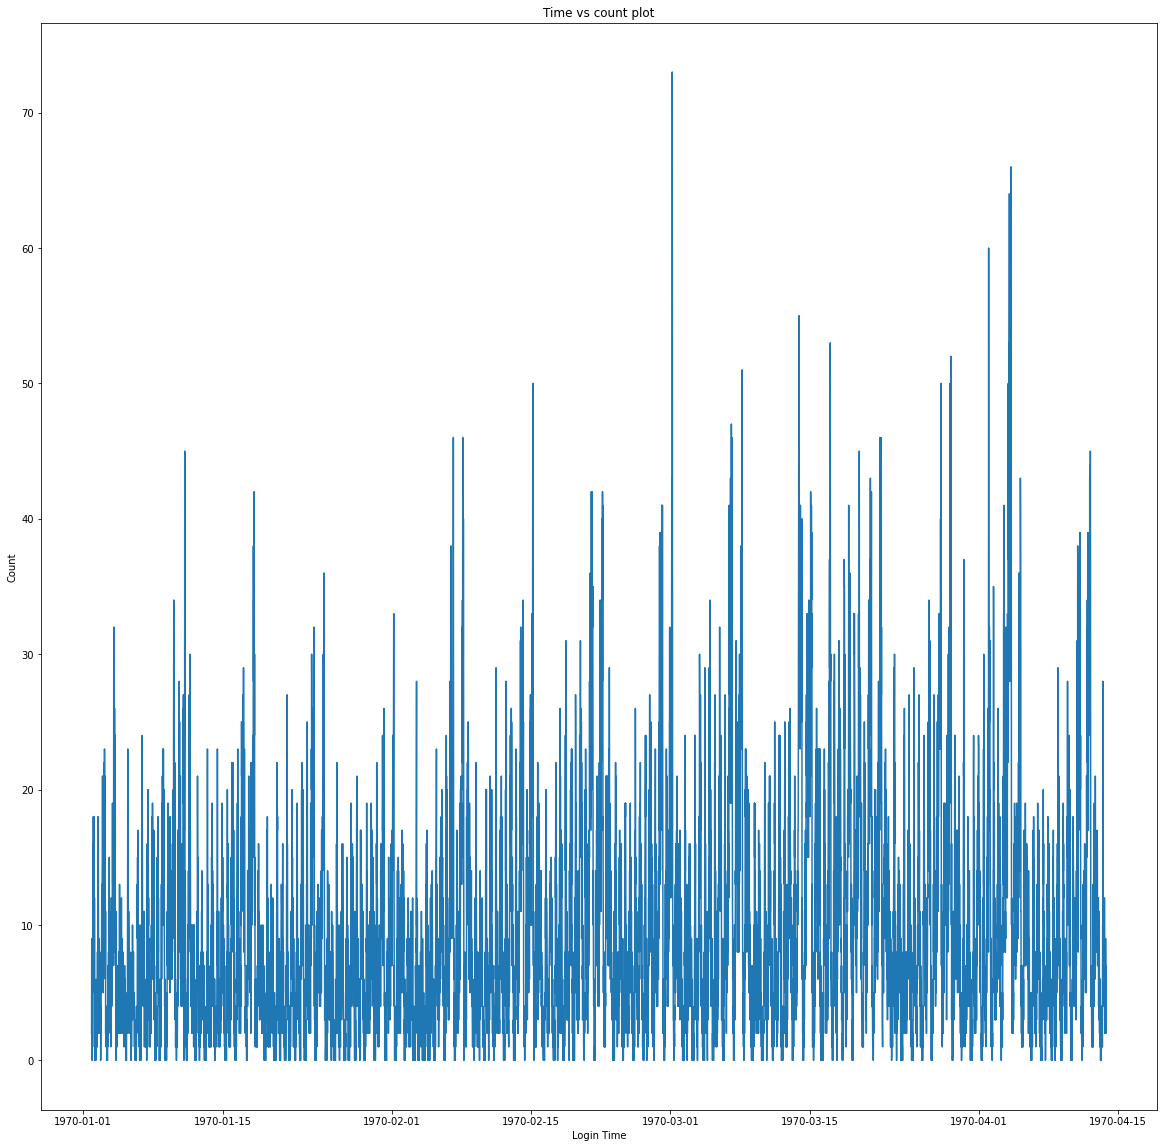

In [64]:
figure = plt.figure(figsize=(20,20))
sns.lineplot(data= log["count"])
plt.xticks()
plt.xlabel("Login Time")
plt.ylabel("Count")
plt.title("Time vs count plot")
plt.show()


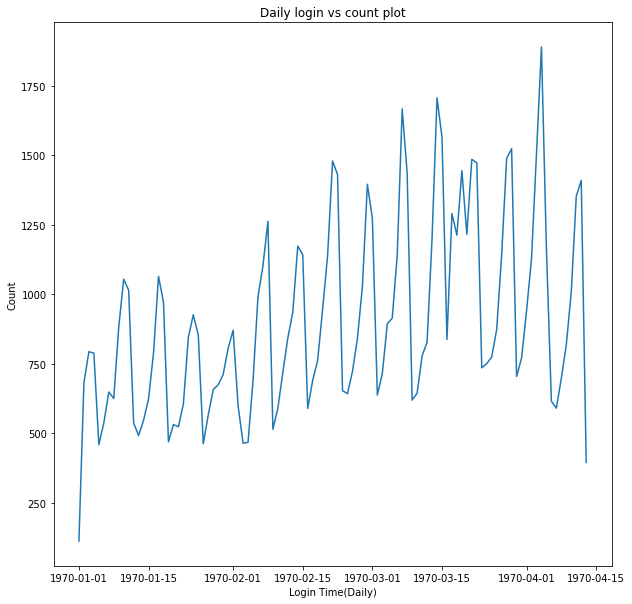

In [137]:
figure = plt.figure(figsize=(10,10))
log_mean = log["count"].resample("D").sum() 
sns.lineplot(data = log_mean)
plt.xticks()
plt.xlabel("Login Time(Daily)")
plt.ylabel("Count")
plt.title("Daily login vs count plot")
plt.show()


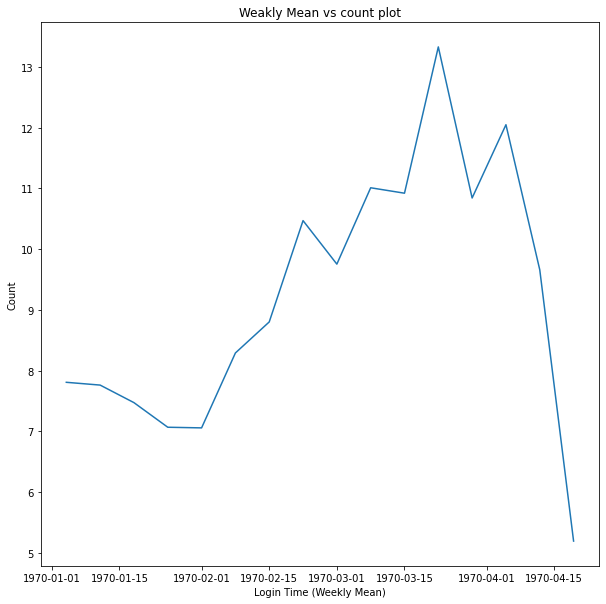

In [69]:
figure = plt.figure(figsize=(10,10))
log_mean = log["count"].resample("W").mean() 
sns.lineplot(data = log_mean)
plt.xticks()
plt.xlabel("Login Time (Weekly Mean)")
plt.ylabel("Count")
plt.title("Weakly Mean vs count plot")
plt.show()


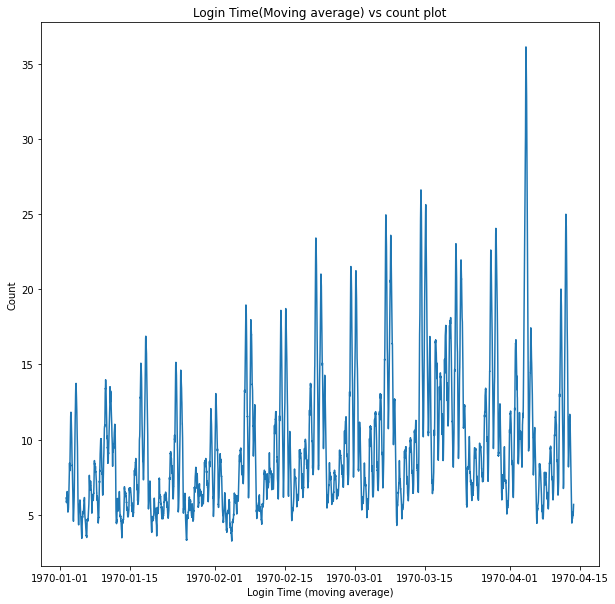

In [139]:
# plotting moving average (window = N past observations)
figure = plt.figure(figsize=(10,10))
ma = log["count"].rolling(window=50).mean() 
sns.lineplot(data = ma)
plt.xticks()
plt.xlabel("Login Time (moving average)")
plt.ylabel("Count")
plt.title("Login Time(Moving average) vs count plot")
plt.show()


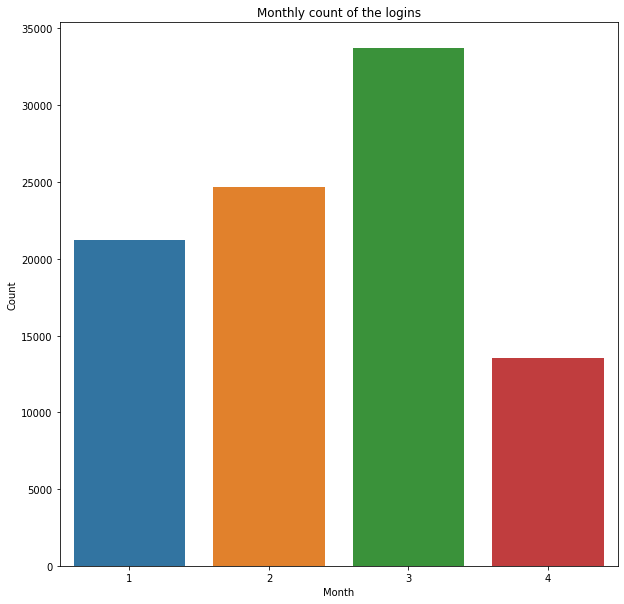

In [132]:
# plotting moving average (window = N past observations)
figure = plt.figure(figsize=(10,10))
sns.barplot(x=login_data.month.unique(),y=login_data.groupby("month").count()["count"])
plt.xticks()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly count of the logins")
plt.show()


<h2> Ultimate data challange <\h2>

In [17]:
df = pd.read_json("ultimate_data_challenge.json")

In [18]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
df.shape

(50000, 12)

In [20]:
df.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
dtype: int64

In [21]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
Categorical_features = ["city","phone"]

df[Categorical_features] = df[Categorical_features].astype('category')

In [24]:
Datetime_feature = ["signup_date","last_trip_date"]

df[Datetime_feature] = df[Datetime_feature].astype('datetime64[ns]')

In [25]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  category      
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](2), fl

<AxesSubplot:>

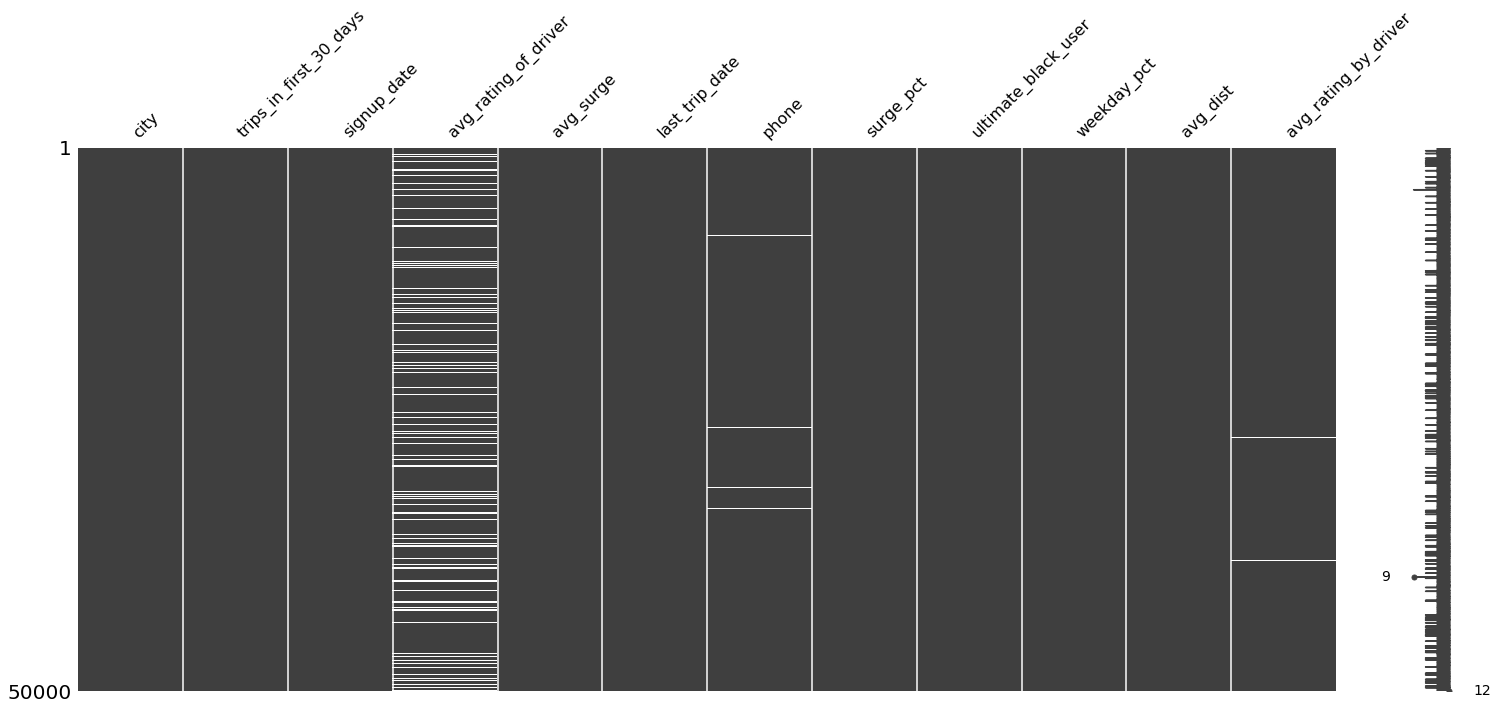

In [27]:
msno.matrix(df)

In [28]:
df["avg_rating_of_driver"].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [36]:
df[["avg_rating_of_driver","avg_rating_by_driver"]]=df[["avg_rating_of_driver","avg_rating_by_driver"]].fillna(0)

<AxesSubplot:>

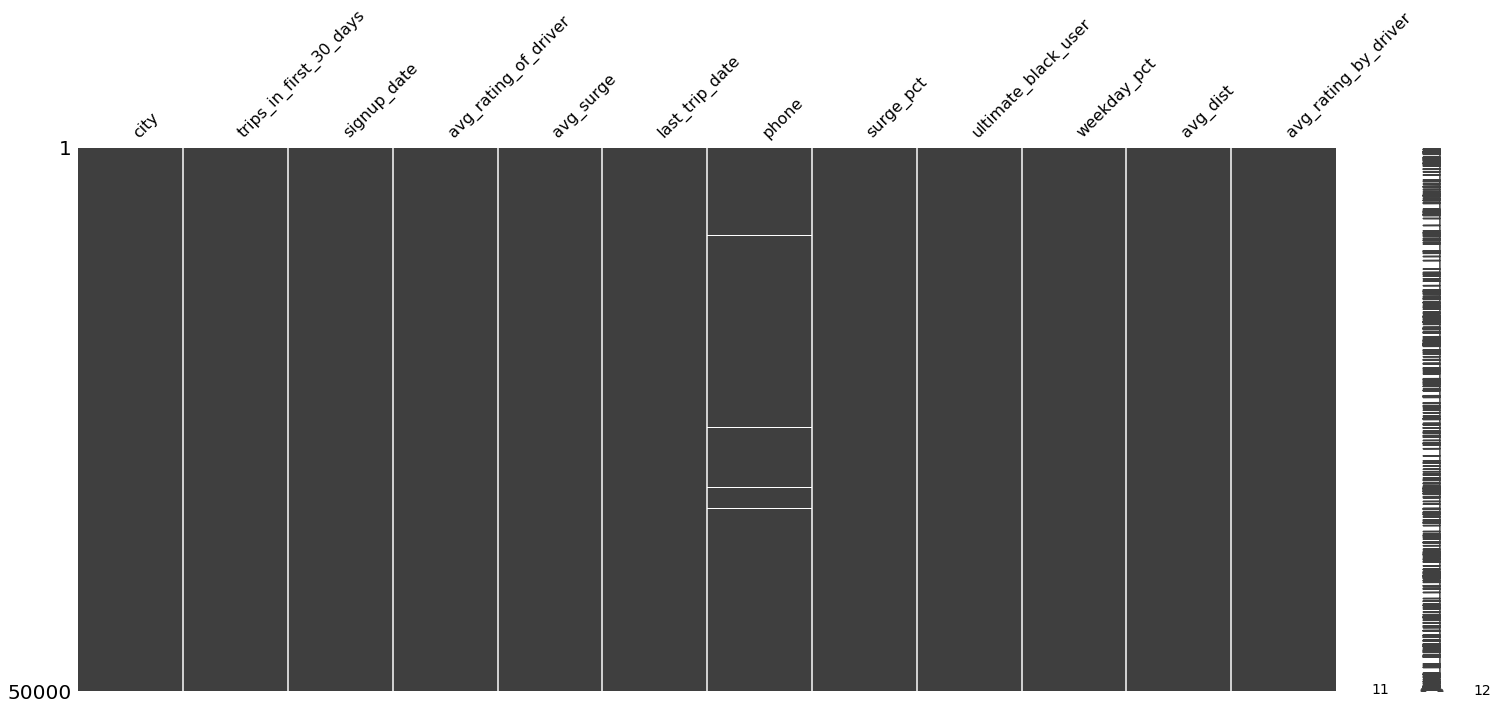

In [37]:
msno.matrix(df)

In [38]:
df["avg_rating_of_driver"].describe()

count    50000.000000
mean         3.854082
std          1.788881
min          0.000000
25%          4.000000
50%          4.700000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [39]:
df['phone'].fillna('Android',inplace=True)

In [40]:
df.phone.unique()

['iPhone', 'Android']
Categories (2, object): ['iPhone', 'Android']

<AxesSubplot:>

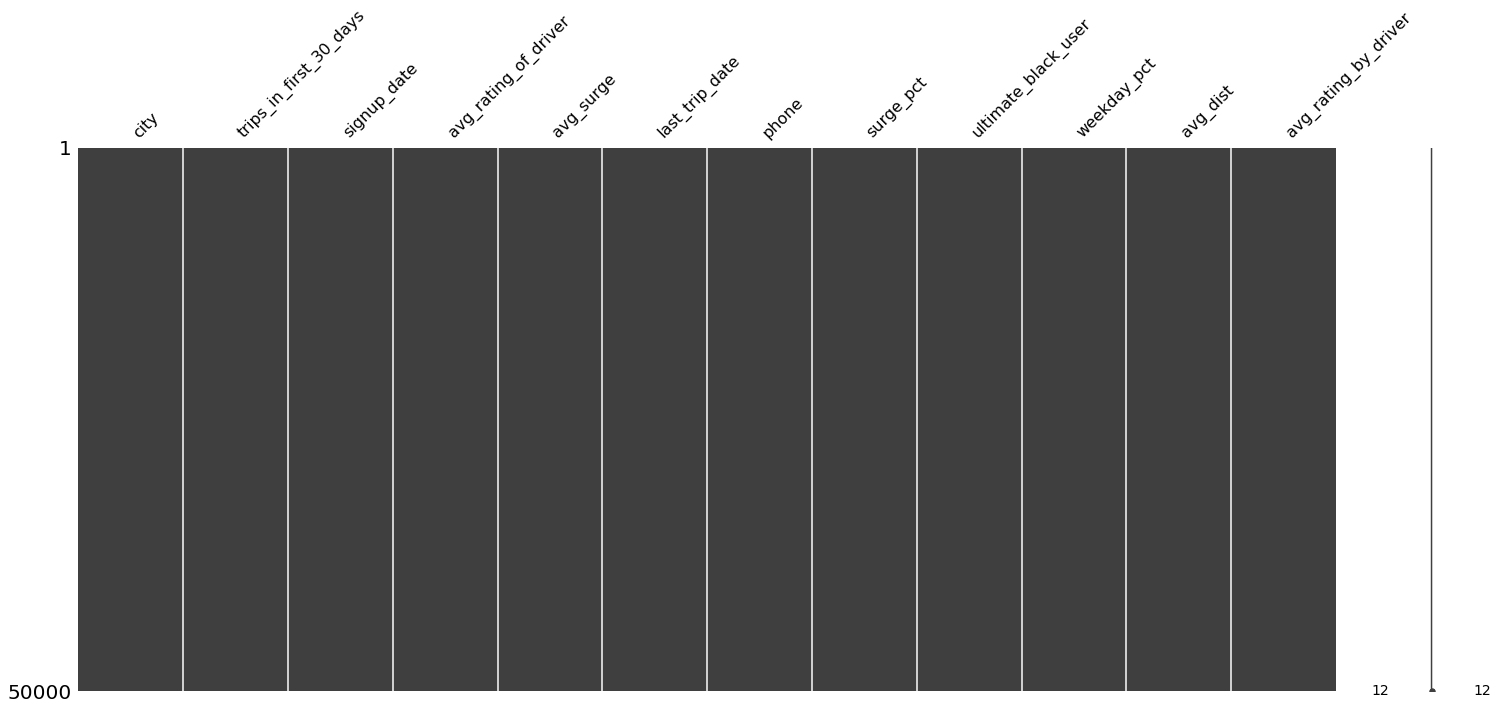

In [41]:
msno.matrix(df)

In [61]:
days = df["last_trip_date"]-df["signup_date"]

In [50]:
df["Active_days"] = days.dt.days

In [77]:
days1 = df["last_trip_date"].max()-df["last_trip_date"]

In [78]:
df["Last_Active_days"] = days1.dt.days

In [90]:
df["is_active"]=df["Last_Active_days"] <=30

In [101]:
df["is_active_half_year"] = df["Last_Active_days"] <=180

In [102]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Active_days,Last_Active_days
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,3.854082,1.074764,8.849536,60.926084,5.796827,4.758950,92.790100,72.665220
std,3.792684,1.788881,0.222336,19.958811,37.081503,5.707357,0.538617,62.129822,61.718985
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,33.300000,2.420000,4.700000,27.000000,13.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,110.000000,54.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,150.000000,137.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,181.000000,181.000000


In [103]:
df[(df["last_trip_date"].dt.day-df["signup_date"].dt.day) < 30]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active_days,Last_Active_days,is_active,is_active_half_year
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,True,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,57,False,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,175,False,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,True,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131,26,True,True
49996,Astapor,1,2014-01-24,0.0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1,157,False,True
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111,40,False,True
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1,167,False,True


<AxesSubplot:xlabel='Active_days', ylabel='Count'>

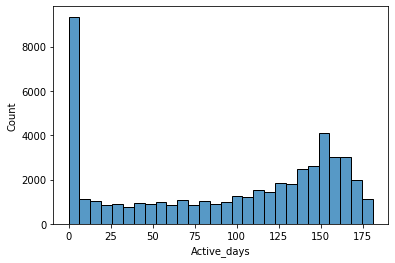

In [104]:
sns.histplot(df["Active_days"])

<AxesSubplot:xlabel='Last_Active_days', ylabel='Count'>

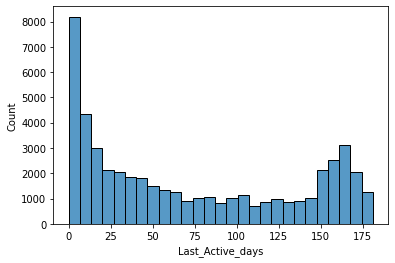

In [82]:
sns.histplot(df["Last_Active_days"])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


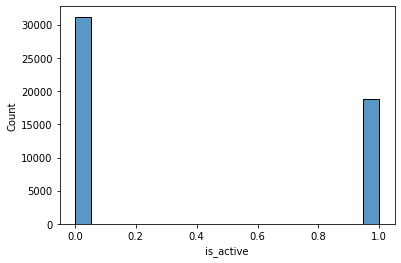

In [100]:
sns.histplot(df["is_active"])
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


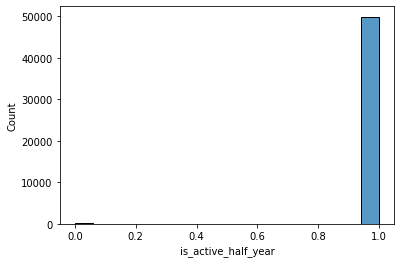

In [105]:
sns.histplot(df["is_active_half_year"])
plt.show()

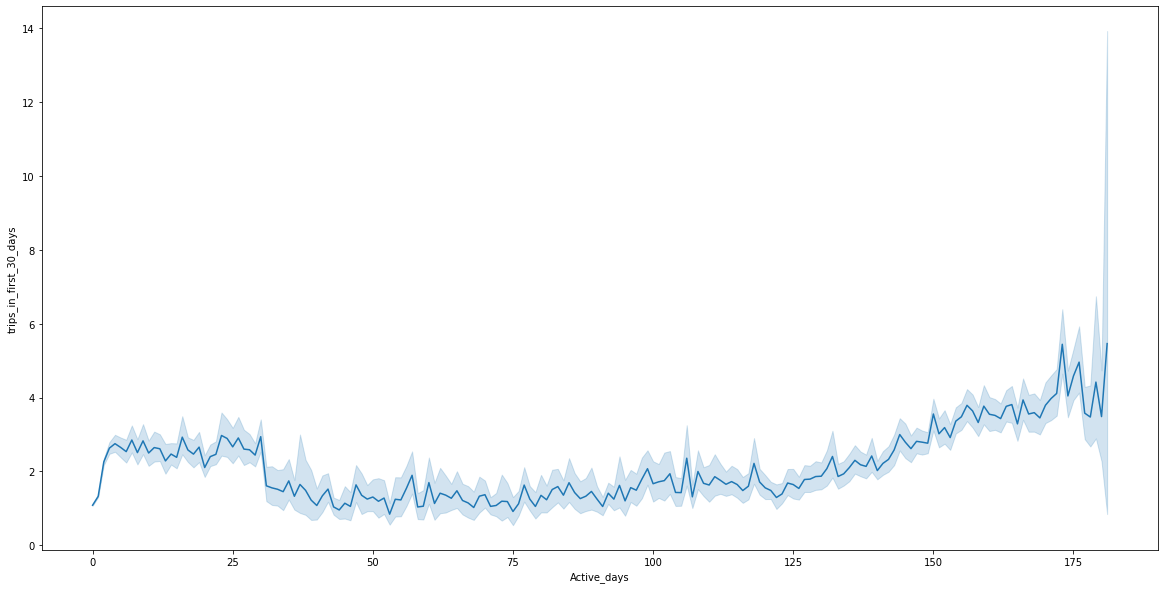

In [52]:
plt.figure(figsize=(20,10))
plot=sns.lineplot(x=df["Active_days"],y=df["trips_in_first_30_days"])
plt.show()

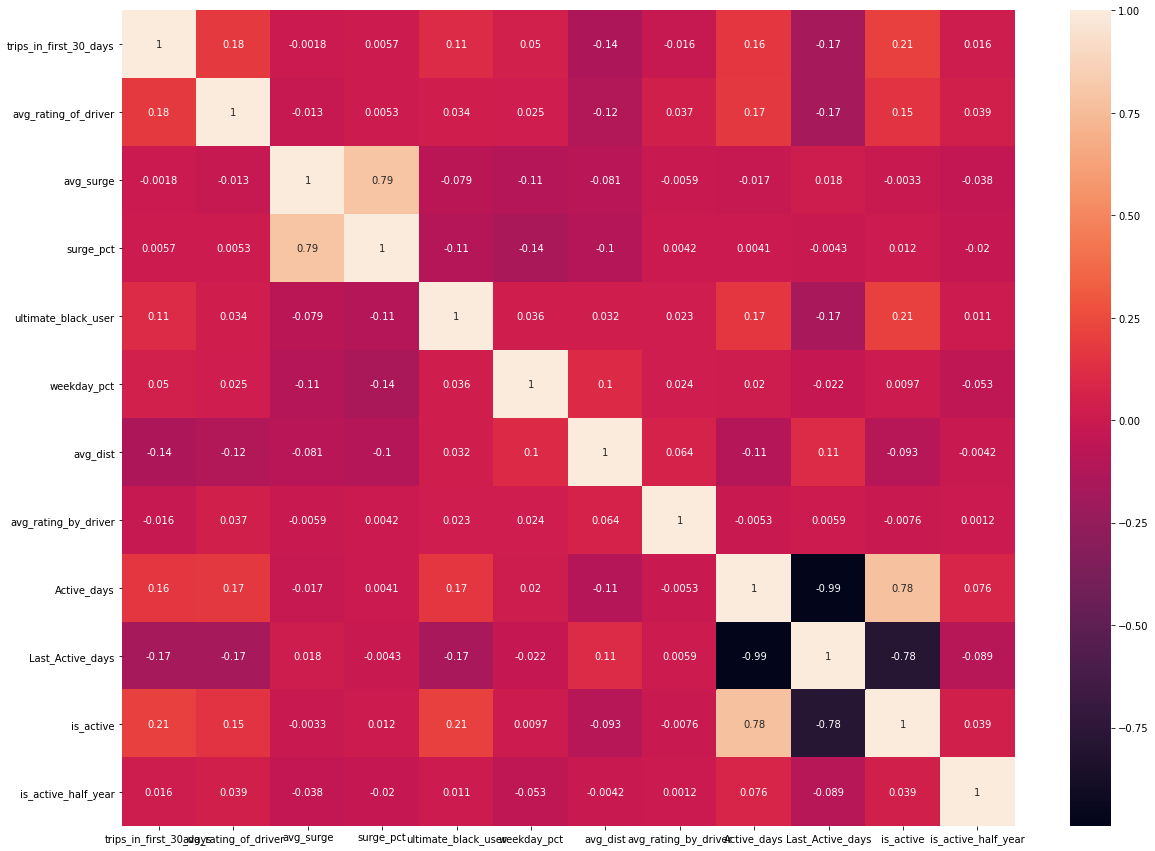

In [106]:
_=plt.figure(figsize=(20,15))
plot=sns.heatmap(df.corr(),annot=True)
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plt.show()

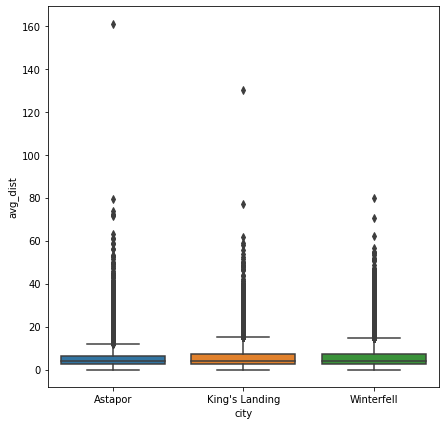

In [107]:
plt.figure(figsize=(7,7))
sns.boxplot(x="city",y="avg_dist",data=df)
plt.show()

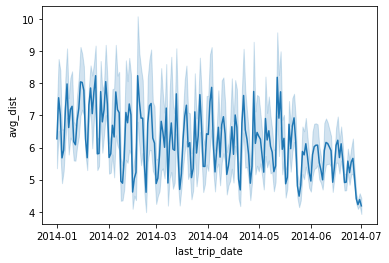

In [108]:
sns.lineplot(x="last_trip_date",y="avg_dist",data=df)
plt.show()

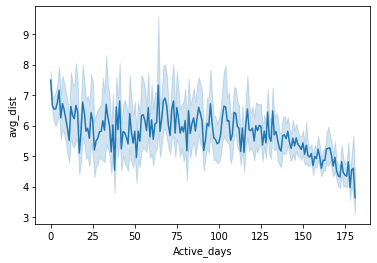

In [109]:
sns.lineplot(x="Active_days",y="avg_dist",data=df)
plt.show()

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
import time

In [111]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active_days,Last_Active_days,is_active,is_active_half_year
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,14,True,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,57,False,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,175,False,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,2,True,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,108,False,True


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  category      
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  Active_days             50000 non-null  int64 

In [121]:
X = df.drop("is_active",axis=1)
y = df["is_active"]

numeric_features = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','Active_days','Last_Active_days']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['city', 'phone','ultimate_black_user','is_active_half_year']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [132]:
from  sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


classifiers = [
    svm.SVC(),
    linear_model.LogisticRegression(),
    RandomForestClassifier(),
    linear_model.LinearRegression(),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(cv=3),
    linear_model.SGDClassifier()]


for item in classifiers:
    print(item)
    clf = item
    
    start=time.time()
    model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])
    
    model.fit(X_train, y_train)
    
    y_pred=model.predict(X_test)

    print("model score: %.3f" % model.score(X_test, y_test))
    
    end = time.time()

    print("Over all time taken : ", end-start)
    print("\n")


SVC()
model score: 0.990
Over all time taken :  16.988971710205078


LogisticRegression()
model score: 0.996
Over all time taken :  0.6570377349853516


RandomForestClassifier()
model score: 1.000
Over all time taken :  3.242185354232788


LinearRegression()
model score: 0.646
Over all time taken :  0.845048189163208


RidgeClassifier()
model score: 0.923
Over all time taken :  0.39002227783203125


RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), cv=3)
model score: 0.923
Over all time taken :  0.5860333442687988


SGDClassifier()
model score: 0.992
Over all time taken :  0.37302136421203613




In [134]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  LogisticRegression())])
    
model = pipe.fit(X_train, y_train)

In [135]:
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        True       1.00      0.99      1.00      7805
       False       0.99      0.99      0.99      4695

    accuracy                           0.99     12500
   macro avg       0.99      0.99      0.99     12500
weighted avg       0.99      0.99      0.99     12500



In [137]:
onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one_hot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [139]:
import eli5

In [158]:
feature_list = eli5.explain_weights(pipe.named_steps['classifier'], feature_names=numeric_features_list)


In [155]:
print(feature_list.feature_importances)

None


In [161]:
feature_list2 = eli5.formatters.as_dataframe.explain_weights_df(pipe.named_steps['classifier'], feature_names=numeric_features_list)

In [179]:
feature_list2

,target,feature,weight
0,True,Active_days,2.267307
1,True,city_King's Landing,0.526097
2,True,ultimate_black_user_True,0.229815
3,True,phone_iPhone,0.145902
4,True,trips_in_first_30_days,0.113749
5,True,avg_dist,0.023443
6,True,avg_surge,0.012817
7,True,is_active_half_year_True,0.002808
8,True,is_active_half_year_False,-0.000423
9,True,surge_pct,-0.004378


<function matplotlib.pyplot.show(close=None, block=None)>

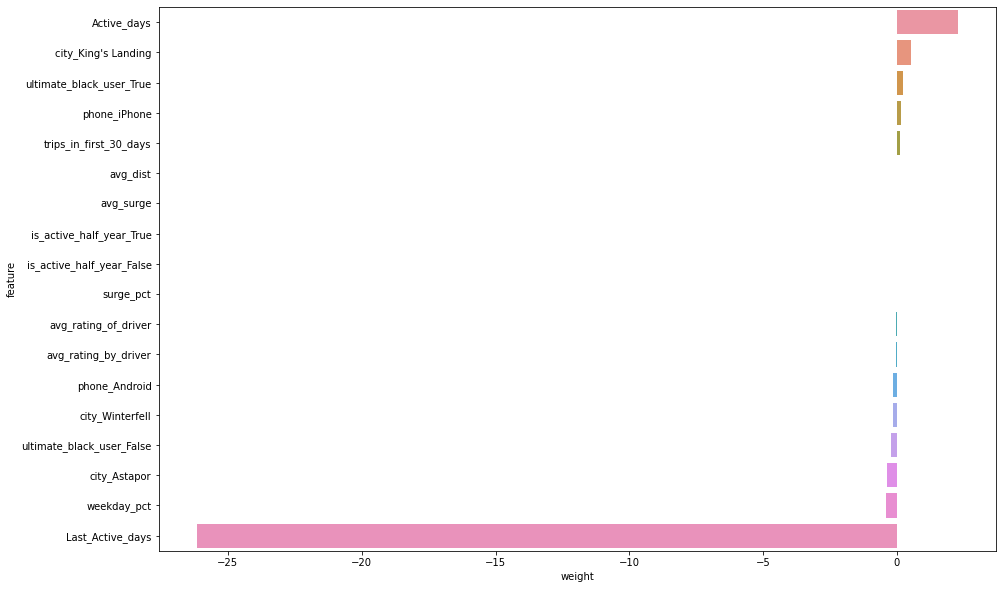

In [180]:
plt.figure(figsize=(15,10))
sns.barplot(x= "weight",y="feature",data=feature_list2)
plt.show

<h3>In order to retain more rider companay has to focus on rider with more number of active days, King's landing rider are very constant company should try to get more rider from king's landing , Compny should also try to enroll more black user. Iphone user are more likely to be active than android users<\h3>